In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
assets=['INFY','^NSEI']
pf_data=pd.DataFrame()

for a in assets:
    pf_data[a]=yf.download(a,start='2010-1-1')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [15]:
pf_data.tail()

,INFY,^NSEI
Date,,
2024-12-23,22.780001,23753.449219
2024-12-24,22.770000,23727.650391
2024-12-26,22.639999,23750.199219
2024-12-27,22.480000,23813.400391
2024-12-30,22.100000,23644.900391


<Axes: xlabel='Date'>

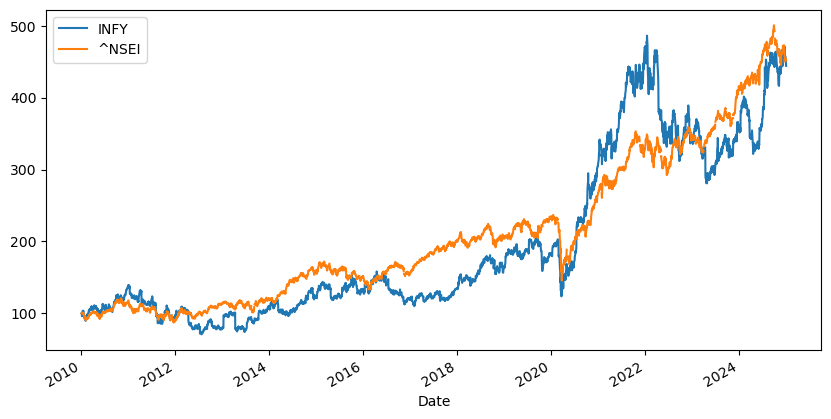

In [17]:
(pf_data/pf_data.iloc[0]*100).plot(figsize=(10,5))

In [19]:
log_returns=np.log(pf_data/pf_data.shift(1))

In [21]:
log_returns

,INFY,^NSEI
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.003869,0.008696
2010-01-06,-0.015386,0.000739
2010-01-07,-0.030950,-0.003547
2010-01-08,0.002570,-0.003493
...,...,...
2024-12-23,0.002197,0.007011
2024-12-24,-0.000439,-0.001087
2024-12-26,-0.005726,0.000950


In [23]:
log_returns.mean()*250

INFY     0.098882
^NSEI    0.103404
dtype: float64

In [25]:
log_returns.cov()*250

,INFY,^NSEI
INFY,0.083825,0.016523
^NSEI,0.016523,0.027520


In [27]:
log_returns.corr()

,INFY,^NSEI
INFY,1.000000,0.345165
^NSEI,0.345165,1.000000


In [29]:
num_assets =len(assets)
num_assets

2

In [35]:
weights=np.random.random(num_assets)
weights/=np.sum(weights)
weights

array([0.11455267, 0.88544733])

In [37]:
weights[0]+weights[1]

1.0

In [39]:
#Expected Portfolio Return:

In [41]:
np.sum(weights*log_returns.mean())*250

0.10288554356580491

In [43]:
#Expected Portfolio Variance

In [45]:
np.dot(weights.T,np.dot(log_returns.cov()*250,weights))

0.026028175613273388

In [47]:
#Exppected Portfolio Volatility

In [53]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250,weights)))

0.1613325001767263

In [99]:
pfolio_returns=[]
pfolio_volatilities=[]
weight_INFY=[]

for x in range(1000):
    weights=np.random.random(num_assets)
    weights/=np.sum(weights)
    weight_INFY.append(weights[0])
    pfolio_returns.append(np.sum(weights*log_returns.mean())*250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250,weights))))

pfolio_returns=np.array(pfolio_returns)
pfolio_volatilities=np.array(pfolio_volatilities)


In [81]:
portfolios= pd.DataFrame({'Return':pfolio_returns, 'Volatility': pfolio_volatilities})

In [83]:
portfolios.head()

,Return,Volatility
0,0.098989,0.284062
1,0.099502,0.258518
2,0.101232,0.187127
3,0.098959,0.285557
4,0.100320,0.221206


Text(0, 0.5, 'Expected Return')

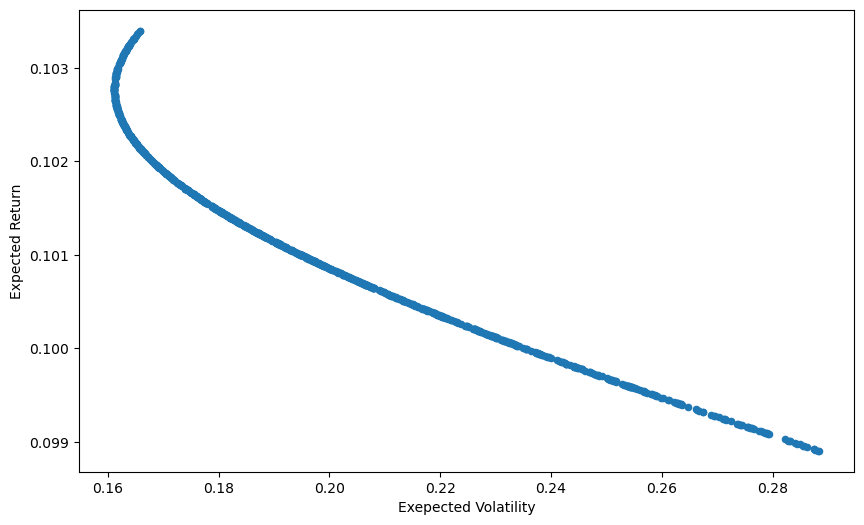

In [89]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6));
plt.xlabel('Exepected Volatility')
plt.ylabel('Expected Return')

In [101]:
portfolio_w= pd.DataFrame({'Weight':weight_INFY, 'Volatility': pfolio_volatilities})

Text(0, 0.5, 'weightage of infy')

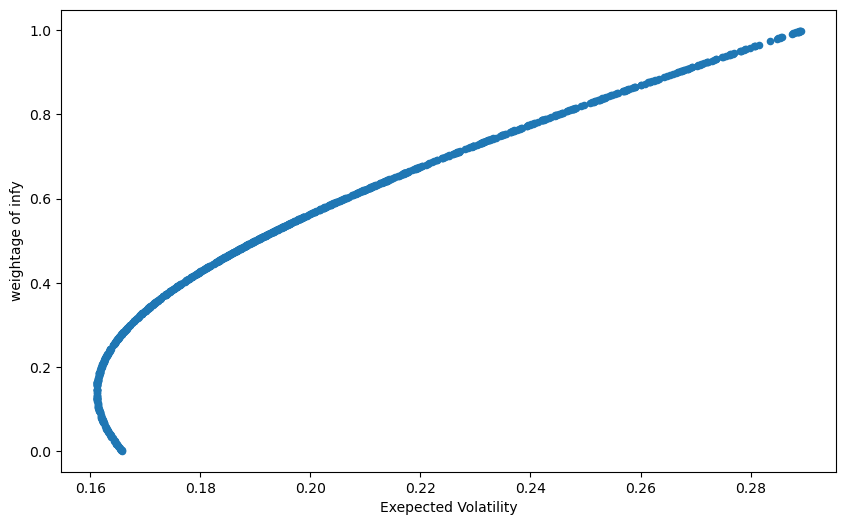

In [107]:
portfolio_w.plot(x='Volatility', y='Weight', kind='scatter', figsize=(10,6));
plt.xlabel('Exepected Volatility')
plt.ylabel('weightage of infy')